In [1]:
import torch
from LatentPixel import TGraph, LPixelForPreTraining, ModelType
from pixel import PIXELForPreTraining

torch.no_grad().__enter__()

In [2]:
TGraph.init_render(240, pixels_per_patch=32)
text = ['This is a sentence', 'This is another sentence']
model = LPixelForPreTraining(ModelType.SD, 0.25, [4, 4 * 529], 4, 'storage/pixel-base/', 'storage/SD2_VQGAN/', keep_decoder=True, init_connection_layer=True)

Some weights of PIXELForPreTraining were not initialized from the model checkpoint at storage/pixel-base/ and are newly initialized because the shapes did not match:
- vit.embeddings.patch_embeddings.projection.weight: found shape torch.Size([768, 3, 16, 16]) in the checkpoint and torch.Size([768, 4, 4, 4]) in the model instantiated
- decoder.decoder_pred.weight: found shape torch.Size([768, 512]) in the checkpoint and torch.Size([64, 512]) in the model instantiated
- decoder.decoder_pred.bias: found shape torch.Size([768]) in the checkpoint and torch.Size([64]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Reinitialize the connection layers


In [3]:
timg = TGraph.from_text(text)
result = model(timg)

/home/tai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:866: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


torch.Size([2, 4, 4, 2116])
torch.Size([2, 3, 32, 16928])


In [4]:
result._value.shape

torch.Size([2, 3, 32, 16928])

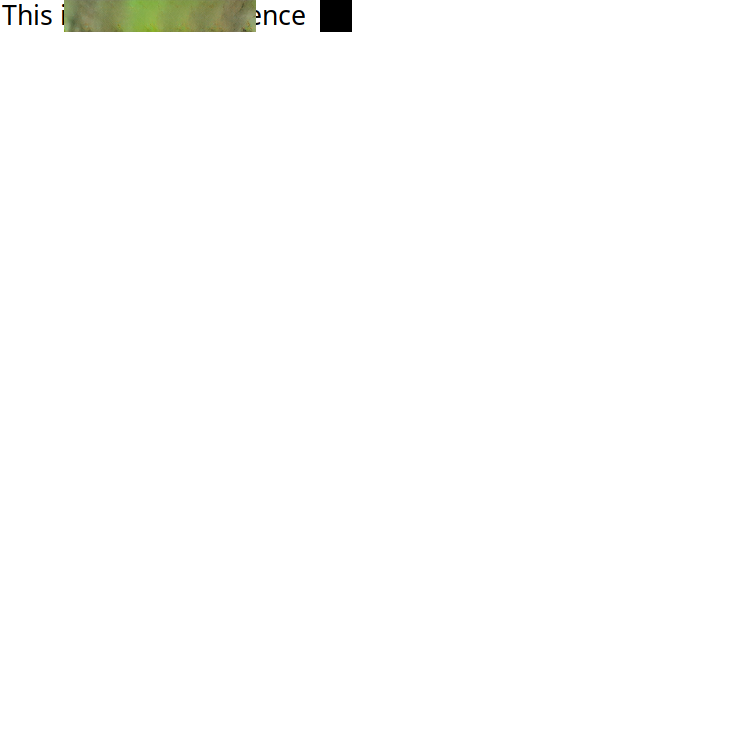

In [8]:
recon = TGraph.reconstruct(timg, result, True)
recon.squarelize().to_PIL()[1]

In [9]:
recon.circle_mask('blue', 0.5, 2)

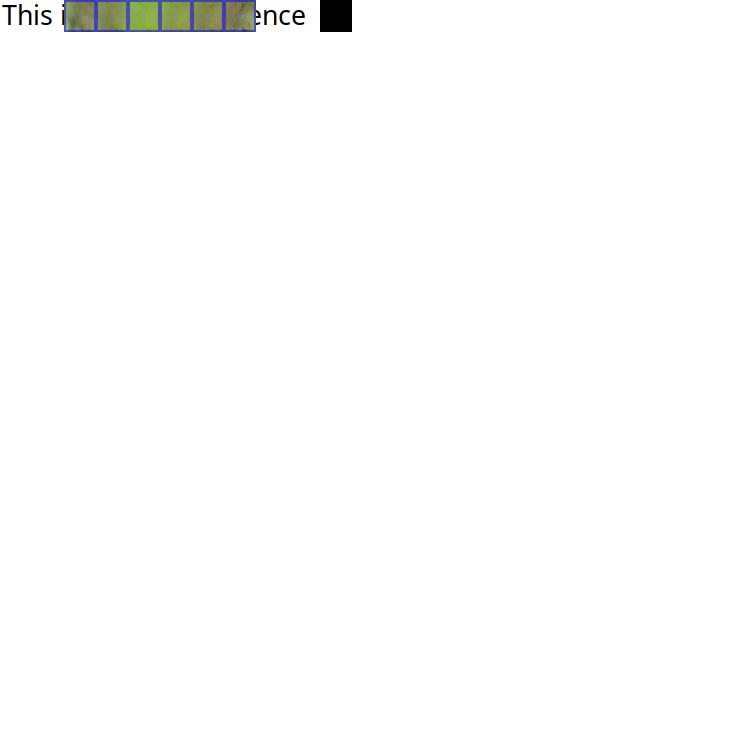

In [11]:
recon.squarelize().to_PIL()[1]

In [13]:
recon.patch_mask[1]

tensor([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 